#### 목표변수 FAT를 예측하기 위한 파생변수(BMI 등)를  생성하여 회귀분석을 실시하여 결과를 해석하고, 
#### predict method를 이용하여 예측값을 구하라.  
#### (BMI 계산 시, WEIGHT 단위는 pound(1lb> 0.45kg), 
#### HEIGHT 단위는 inch(1inch>2.54cm)이므로 변환하여 사용할 것)  
#### 데이터 : 체질검사.CSV(변수: 14, 자료 수: 252개)  

##### STEP 0 패키지 불러오기 

In [1]:
# STEP 0 패키지 불러오기 
import pandas as pd 
import numpy as np 

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [2]:
#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

matplotlib.rc('axes',unicode_minus=False)

##### STEP 1 데이터 구성하기

In [3]:
# 다주선형 회귀분석 
df_raw = pd.read_csv("D:/data/2/체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


##### STEP 2 변수 간의 경향성 파악 - 그래프 분석

In [4]:
# BMI 계산 시, WEIGHT 단위는 pound(1lb > 0.45kg), 
# HEIGHT 단위는 inch(1inch > 2.54cm)이므로 
# 단위를 변환해줘야 합니다
# 데이터 확인하기
df_raw[['WEIGHT', 'HEIGHT']] 

,WEIGHT,HEIGHT
0,363.15,72.25
1,168.00,71.25
2,177.75,68.50
3,147.75,65.75
4,219.00,64.00
...,...,...
247,207.50,70.00
248,170.75,67.50
249,162.75,66.00
250,167.75,68.50


In [5]:
# 문제 조건에 맞게 WEIGHT와 HEIGHT의 단위를 조절해줍니다.
# bmi이므로 단위를 kg과 m로 마춰줍니다.
for i in range(252): 
    df_raw.loc[i:i,'WEIGHT'] = df_raw.loc[i:i,'WEIGHT'] * 0.45
    df_raw.loc[i:i,'HEIGHT'] = df_raw.loc[i:i,'HEIGHT'] * 0.0254

# bmi단위에 맞게 잘 변경되었는지 확인
df_raw[['WEIGHT', 'HEIGHT']]    

,WEIGHT,HEIGHT
0,163.4175,1.83515
1,75.6000,1.80975
2,79.9875,1.73990
3,66.4875,1.67005
4,98.5500,1.62560
...,...,...
247,93.3750,1.77800
248,76.8375,1.71450
249,73.2375,1.67640
250,75.4875,1.73990


In [18]:
# bmi생성 
# bmi = 체중(kg) / (신장(m))**2
df_raw['BMI'] = df_raw['WEIGHT'] / df_raw['HEIGHT']**2 # BMI추가 및 계산

#확인
df_raw[['WEIGHT', 'HEIGHT','BMI']]    

,WEIGHT,HEIGHT,BMI
1,75.6000,1.80975,23.082595
2,79.9875,1.73990,26.422478
3,66.4875,1.67005,23.838617
4,98.5500,1.62560,37.293165
5,91.0125,1.77800,28.789726
...,...,...,...
247,93.3750,1.77800,29.537049
248,76.8375,1.71450,26.139558
249,73.2375,1.67640,26.060228
250,75.4875,1.73990,24.935981


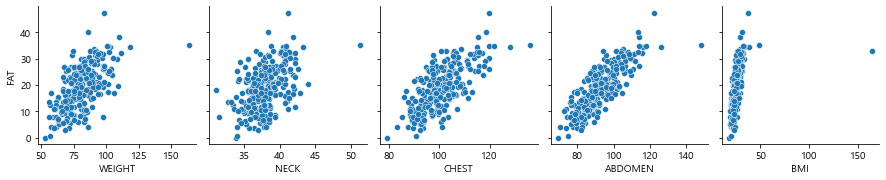

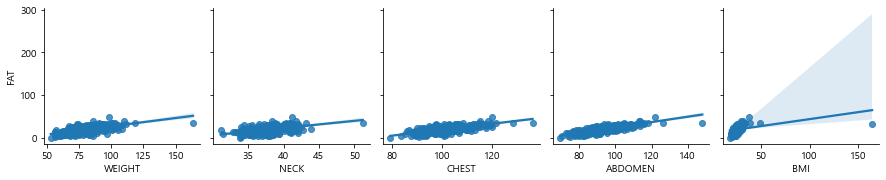

In [7]:
# 산점도 행렬: 목표변수와 설명변수 지정
sns.pairplot(df_raw,y_vars='FAT', x_vars = ['WEIGHT','NECK','CHEST','ABDOMEN','BMI'])
# 회귀 적합선 추가
sns.pairplot(df_raw,y_vars='FAT', x_vars = ['WEIGHT','NECK','CHEST','ABDOMEN','BMI'], kind ="reg")

In [8]:
# 목표변수(FAT)과 다수 설명변수간의 선형 관계 확인 
# 산점도에서 이상치를 확인
# 이상치 처리 및 적정한 설명변수 선택 필요

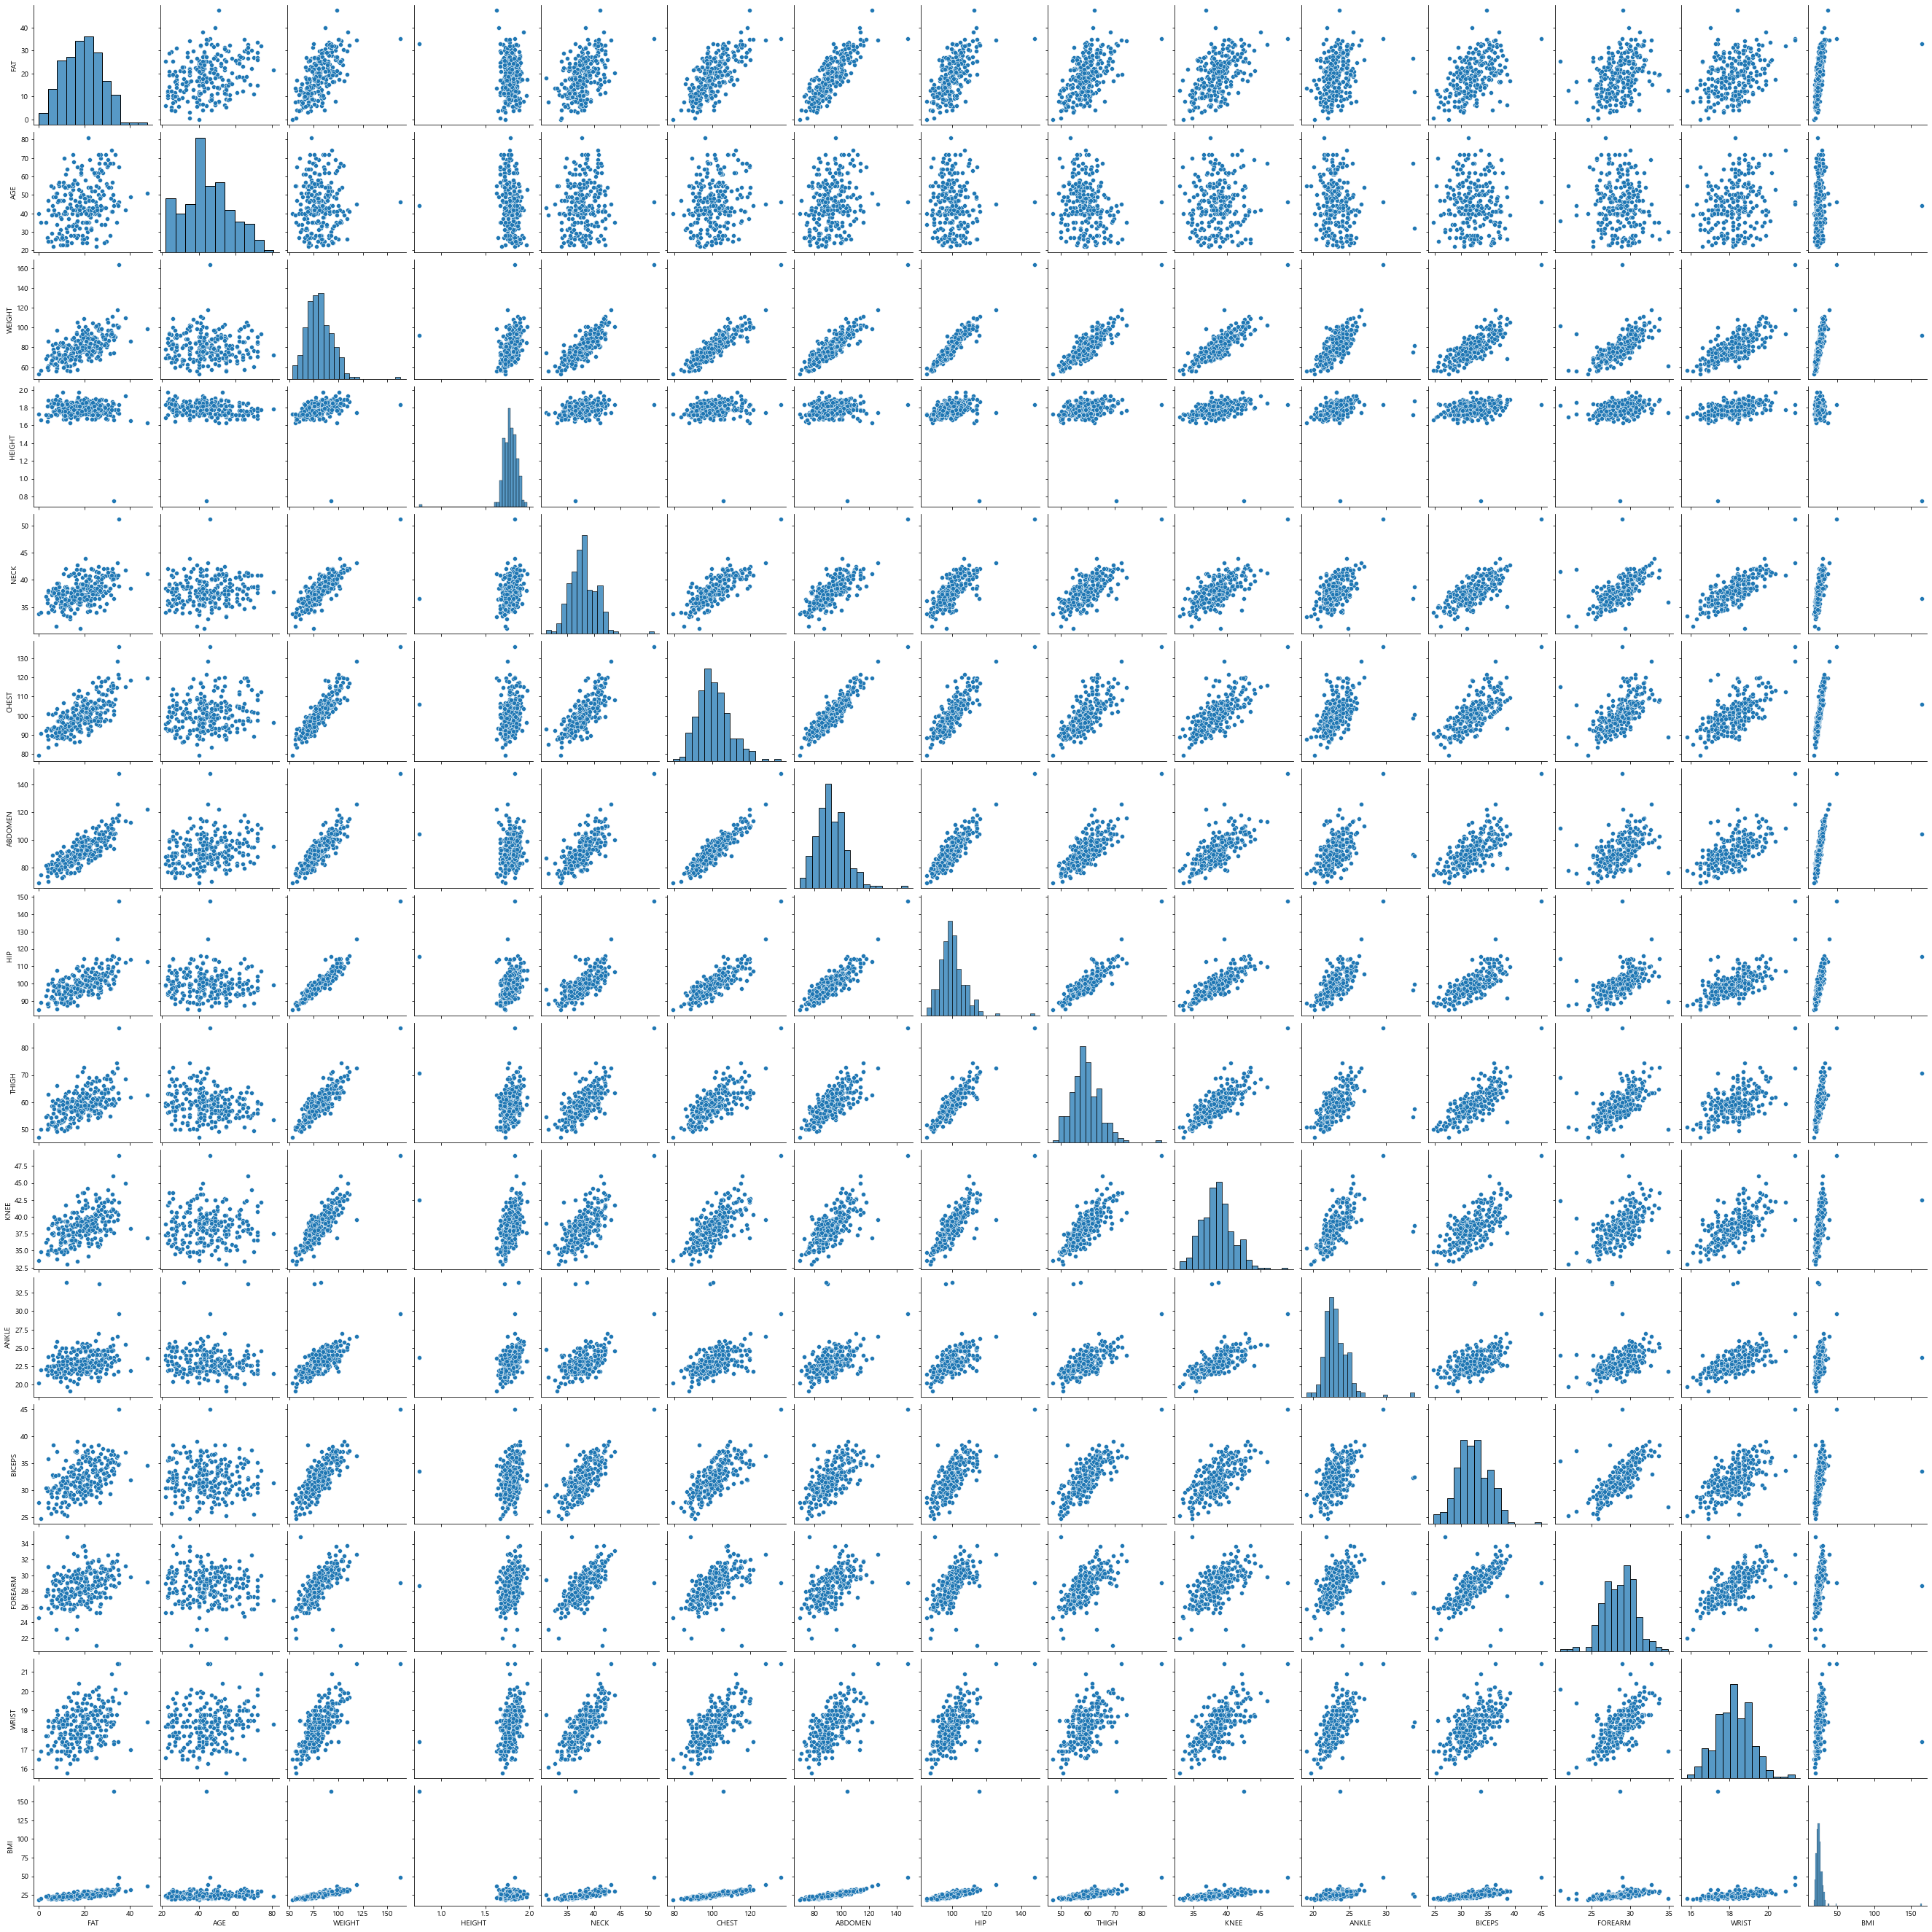

In [9]:
sns.pairplot(df_raw)

In [11]:
# 이상치가 있다는것을 확인할수 있다
# 이상치 처리 
# #150이 넘는 웨이트 값 삭제
df_raw = df_raw[df_raw["WEIGHT"]<=150] 
#100이 넘지 않는 헤이트값 삭제
df_raw = df_raw[df_raw["HEIGHT"]>=1] 

In [12]:
df_raw.corr().round(3) #상관분석

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679


##### STEP 3 회귀 모델 생성

In [19]:
df_train, df_test = train_test_split(df_raw , test_size=0.4 , random_state =1234)
print('train data size: {}'.format(df_train.shape))
print('train data size: {}'.format(df_test.shape))

# 설명변수 전체로 회귀모델 생성
reg_model = smf.ols(formula = 'FAT~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP +THIGH + \
                                KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI', data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())
#p값이 유의수준보다 작은 AGE, WEIGHT,ABDOMEN,WRIST,BMI는 유의

train data size: (150, 15)
train data size: (100, 15)
                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     31.27
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.57e-35
Time:                        21:55:18   Log-Likelihood:                -422.67
No. Observations:                 150   AIC:                             875.3
Df Residuals:                     135   BIC:                             920.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [86]:
df_train_x = df_train.drop('FAT', axis = 1)

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) \
    for i in range(df_train_x_const.shape[1])]

# vif정렬
df_vif.sort_values('VIF',ascending = True).round(2)

,variable,VIF
12,FOREARM,1.99
10,ANKLE,2.06
1,AGE,2.46
13,WRIST,3.82
11,BICEPS,3.94
9,KNEE,4.94
4,NECK,5.21
8,THIGH,7.77
5,CHEST,14.40
6,ABDOMEN,16.07


In [89]:
reg_model = smf.ols(formula = 'FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
    KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     33.27
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           7.01e-36
Time:                        22:47:00   Log-Likelihood:                -423.77
No. Observations:                 150   AIC:                             875.5
Df Residuals:                     136   BIC:                             917.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1201     11.867      0.600      0.5

In [100]:
#다중공선성 높은 변수 제거 후 공선성 재확인
df_train_x = df_train.drop(['FAT','WEIGHT','HEIGHT'], axis = 1)

# 상수항 추가함수 적용
df_train_x_const = add_constant(df_train_x)

# df로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) \
    for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values('VIF',ascending = True).round(2)

# backward elimination selection
# RFE : 입력된 모델을 이용하여 변수 중요도가 낮은 순으로 순차적으로 제거

# 목표변수/ 설명변수 분리
df_train_y = df_train['FAT']


# sklearn의 선형회귀 모델
model = LinearRegression()

#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print('Selected variables:{}'.format(selected_cols))
print('Removed variables:{}'.format(removed_cols))

Selected variables:Index(['ABDOMEN', 'HIP', 'ANKLE', 'WRIST', 'BMI'], dtype='object')
Removed variables:Index(['AGE', 'NECK', 'CHEST', 'THIGH', 'KNEE', 'BICEPS', 'FOREARM'], dtype='object')


In [99]:
# backward elimination selection
# RFE : 입력된 모델을 이용하여 변수 중요도가 낮은 순으로 순차적으로 제거

# 목표변수/ 설명변수 분리
df_train_y = df_train['FAT']


# sklearn의 선형회귀 모델
model = LinearRegression()

#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print('Selected variables:{}'.format(selected_cols))
print('Removed variables:{}'.format(removed_cols))

Selected variables:Index(['WEIGHT', 'HEIGHT', 'ABDOMEN', 'WRIST', 'BMI'], dtype='object')
Removed variables:Index(['AGE', 'NECK', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS',
       'FOREARM'],
      dtype='object')


In [102]:
#회귀 모델 생성 
rfe_reg_model = smf.ols(formula = 'FAT ~ ABDOMEN + HIP + ANKLE + WRIST + BMI', data = df_train)
#적합 
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     85.43
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           2.53e-41
Time:                        22:54:35   Log-Likelihood:                -427.72
No. Observations:                 150   AIC:                             867.4
Df Residuals:                     144   BIC:                             885.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7893      8.152      0.465      0.6

<AxesSubplot:>

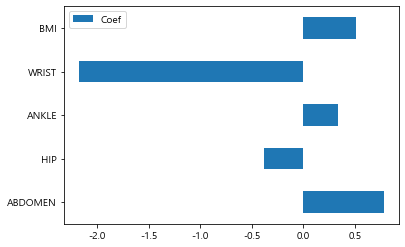

In [106]:
df_reg_coef = pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]},
                            index = ['ABDOMEN','HIP','ANKLE','WRIST','BMI'])
df_reg_coef.plot.barh(y = 'Coef')


회귀계수의 방향은 동일하나 중요도 크기가 변함 설명력은 0.739로 높은 축에 속합니다